In [1]:
import pandas as pd
import numpy as np
import os
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

/Users/hannicho19/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from matplotlib.pyplot import *
from IPython.display import display, HTML
import glob
from anndata import AnnData

In [3]:
import scanpy as sc # import scanpy to handle our AnnData 
import pandas as pd # import pandas to handle dataframes
import matplotlib.pyplot as plt # import matplotlib to visualize our qc metrics

# magic incantation to help matplotlib work with our jupyter notebook
%matplotlib inline 

In [4]:
cd /Users/hannicho19/Desktop

/Users/hannicho19/Desktop


In [5]:
# read in the file
file = "/Users/hannicho19/Desktop/D11.h5"
adata = sc.read(file)

In [6]:
adata

AnnData object with n_obs × n_vars = 253381 × 32738
    obs: 'sample_index', 'sample_id', 'donor_id', 'cluster_id', 'celltype', 'time_point', 'pool_id', 'treatment'
    var: 'gene_ids-0', 'gene_ids-1', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-14', 'gene_ids-15', 'gene_ids-16', 'gene_ids-17', 'gene_ids-18', 'gene_ids-19', 'gene_ids-20', 'gene_ids-21', 'gene_ids-22', 'gene_ids-23', 'gene_ids-24', 'gene_ids-25', 'gene_ids-26', 'gene_ids-27', 'gene_ids-28', 'gene_ids-29', 'gene_ids-30', 'gene_ids-31', 'gene_ids-32', 'gene_ids-33', 'gene_ids-34', 'gene_ids-35', 'gene_ids-36', 'gene_ids-37'
    obsm: 'X_umap'

In [7]:
adata.obs.head()

,sample_index,sample_id,donor_id,cluster_id,celltype,time_point,pool_id,treatment
index,,,,,,,,
AAACCTGAGAACAACT-1-0,0,5245STDY7352549,HPSI0714i-iudw_1,2,P_FPP,D11,pool1,NONE
AAACCTGAGACAAGCC-1-0,0,5245STDY7352549,HPSI0614i-liqa_1,1,P_FPP,D11,pool1,NONE
AAACCTGAGACGCACA-1-0,0,5245STDY7352549,HPSI1113i-podx_1,1,P_FPP,D11,pool1,NONE
AAACCTGAGGAATGGA-1-0,0,5245STDY7352549,HPSI0114i-eipl_1,0,FPP,D11,pool1,NONE
AAACCTGCACGTCTCT-1-0,0,5245STDY7352549,HPSI0914i-suop_5,1,P_FPP,D11,pool1,NONE


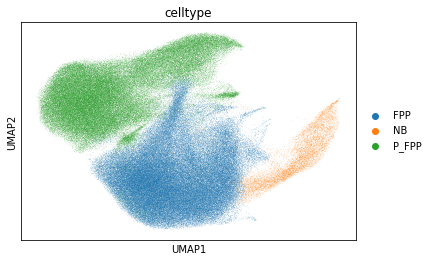

In [6]:
# since this data has been already clustered and annotated- let's plot the umap plot 
plotting_fcn = sc.pl.umap
plotting_fcn(adata, color='celltype')

In [7]:
#let's subset a specific celltype 
#subsample celltype
selected_celltype = ['FPP']
adata_FPP = adata[adata.obs['celltype'].isin(selected_celltype),: ]
adata_FPP.obs.head()

,sample_index,sample_id,donor_id,cluster_id,celltype,time_point,pool_id,treatment
index,,,,,,,,
AAACCTGAGGAATGGA-1-0,0,5245STDY7352549,HPSI0114i-eipl_1,0,FPP,D11,pool1,NONE
AAACCTGGTAGGCATG-1-0,0,5245STDY7352549,HPSI0114i-eipl_1,0,FPP,D11,pool1,NONE
AAACCTGGTCGAGATG-1-0,0,5245STDY7352549,HPSI0714i-iudw_1,0,FPP,D11,pool1,NONE
AAACCTGGTGCGGTAA-1-0,0,5245STDY7352549,HPSI1113i-podx_1,0,FPP,D11,pool1,NONE
AAACCTGTCGCAGGCT-1-0,0,5245STDY7352549,HPSI0214i-eiwy_1,0,FPP,D11,pool1,NONE


In [8]:
# step1.calclate qc metrics 
adata_FPP.var['mito'] = [x.startswith('MT-') for x in adata.var.index] 
sc.pp.calculate_qc_metrics(adata_FPP, inplace=True, qc_vars=['mito'])

Trying to set attribute `.var` of view, copying.


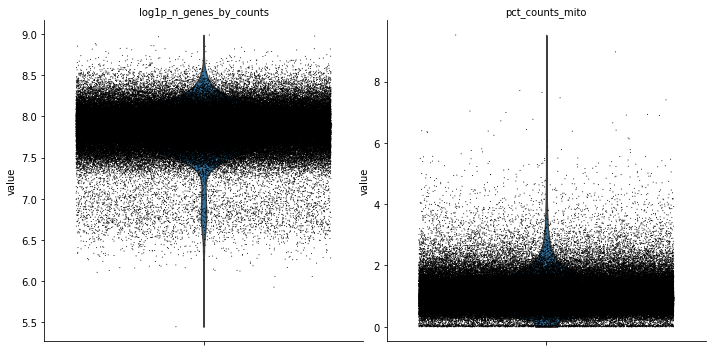

In [9]:
# step2. plotting the qc metrics
sc.pl.violin(adata_FPP, ['log1p_n_genes_by_counts',  'pct_counts_mito'],
            jitter=0.4, multi_panel=True)

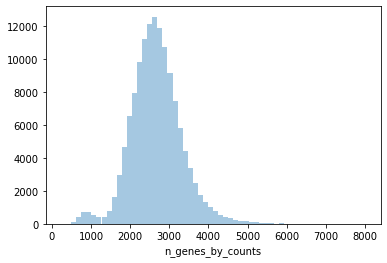

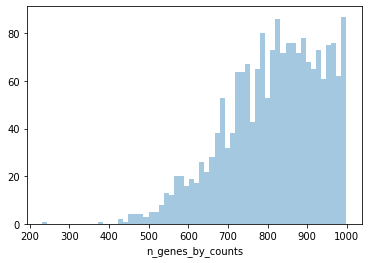

In [10]:
#step 3.we come up with thresholding decsions for genes for the FPP cells

p6 = sb.distplot(adata_FPP.obs['n_genes_by_counts'], kde=False, bins=60)
plt.show()

# there seems to be a small population of cells expressing low (1000 gene) count, let's zoom in

p7 = sb.distplot(adata_FPP.obs['n_genes_by_counts'][adata_FPP.obs['n_genes_by_counts']<1000], kde=False, bins=60)
plt.show()

In [11]:
# QC 1 - cell level - remove cells with low gene counts 
# Here, we filter out the cells with low gene counts, threshold set around 1000 - 
# let's filter out 

# for the FPP cells 
print('Number of cells before gene filter: {:d}'.format(adata_FPP.n_obs))
sc.pp.filter_cells(adata_FPP, min_genes = 1000)
print('Number of cells after gene filter: {:d}'.format(adata_FPP.n_obs))




Number of cells before gene filter: 136074
Number of cells after gene filter: 134146


In [12]:
#QC 2 - cell level - remove cells with high mito fraction

print('Number of cells before MT filter: {:d}'.format(adata_FPP.n_obs))
adata_FPP = adata_FPP[adata_FPP.obs['pct_counts_mito'] < 5]
print('Number of cells after MT filter: {:d}'.format(adata_FPP.n_obs))




Number of cells before MT filter: 134146
Number of cells after MT filter: 134084


In [13]:
#QC -3 - gene level

#Filter genes that are not expressed in more than 20 cells in the FPP cells
print('Total number of genes: {:d}'.format(adata_FPP.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_FPP, min_cells=20)
print('Number of genes after cell filter: {:d}'.format(adata_FPP.n_vars))

Total number of genes: 32738


Trying to set attribute `.var` of view, copying.


Number of genes after cell filter: 21215


In [30]:
adata_FPP.var

,gene_ids-0,gene_ids-1,gene_ids-2,gene_ids-3,gene_ids-4,gene_ids-5,gene_ids-6,gene_ids-7,gene_ids-8,gene_ids-9,...,gene_ids-36,gene_ids-37,mito,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells
index,,,,,,,,,,,,,,,,,,,,,
MIR1302-10,ENSG00000243485,ENSG00000243485,ENSG00000243485,ENSG00000243485,ENSG00000243485,ENSG00000243485,ENSG00000243485,ENSG00000243485,ENSG00000243485,ENSG00000243485,...,ENSG00000243485,ENSG00000243485,False,49,0.000379,0.000379,99.963990,51.570515,3.962155,49
RP11-34P13.7,ENSG00000238009,ENSG00000238009,ENSG00000238009,ENSG00000238009,ENSG00000238009,ENSG00000238009,ENSG00000238009,ENSG00000238009,ENSG00000238009,ENSG00000238009,...,ENSG00000238009,ENSG00000238009,False,42,0.000315,0.000315,99.969134,42.910942,3.782164,42
AL627309.1,ENSG00000237683,ENSG00000237683,ENSG00000237683,ENSG00000237683,ENSG00000237683,ENSG00000237683,ENSG00000237683,ENSG00000237683,ENSG00000237683,ENSG00000237683,...,ENSG00000237683,ENSG00000237683,False,1455,0.013652,0.013559,98.930729,1857.655029,7.527608,1431
AP006222.2,ENSG00000228463,ENSG00000228463,ENSG00000228463,ENSG00000228463,ENSG00000228463,ENSG00000228463,ENSG00000228463,ENSG00000228463,ENSG00000228463,ENSG00000228463,...,ENSG00000228463,ENSG00000228463,False,25809,0.233057,0.209497,81.033114,31713.039062,10.364514,25778
RP4-669L17.10,ENSG00000237094,ENSG00000237094,ENSG00000237094,ENSG00000237094,ENSG00000237094,ENSG00000237094,ENSG00000237094,ENSG00000237094,ENSG00000237094,ENSG00000237094,...,ENSG00000237094,ENSG00000237094,False,393,0.003073,0.003068,99.711187,418.134521,6.038192,391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL592183.1,ENSG00000220023,ENSG00000220023,ENSG00000220023,ENSG00000220023,ENSG00000220023,ENSG00000220023,ENSG00000220023,ENSG00000220023,ENSG00000220023,ENSG00000220023,...,ENSG00000220023,ENSG00000220023,False,32047,0.338670,0.291677,76.448844,46084.171875,10.738247,32017
AC011841.1,ENSG00000212884,ENSG00000212884,ENSG00000212884,ENSG00000212884,ENSG00000212884,ENSG00000212884,ENSG00000212884,ENSG00000212884,ENSG00000212884,ENSG00000212884,...,ENSG00000212884,ENSG00000212884,False,365,0.002949,0.002945,99.731764,401.267181,5.997117,363
AL354822.1,ENSG00000215615,ENSG00000215615,ENSG00000215615,ENSG00000215615,ENSG00000215615,ENSG00000215615,ENSG00000215615,ENSG00000215615,ENSG00000215615,ENSG00000215615,...,ENSG00000215615,ENSG00000215615,False,65,0.000455,0.000455,99.952232,61.907997,4.141673,65


In [14]:
# normalization 
# The simplest way to normalize this data is to convert it to counts per million (CPM) by dividing each row by a size factor (the sum of all counts in the row), then multiplying by 1,000,000. Note that this method assumes that each cell originally contained the same amount of RNA.
adata_FPP_cpm = adata_FPP.copy() # apply this to a copy so we can compare methods
adata_FPP_cpm.raw = adata_FPP_cpm # store a copy of the raw values before normalizing
sc.pp.normalize_per_cell(adata_FPP_cpm, 
                         counts_per_cell_after=1e6)

In [15]:
# log transformation 
sc.pp.log1p(adata_FPP_cpm)
adata_FPP_cpm

AnnData object with n_obs × n_vars = 134084 × 21215
    obs: 'sample_index', 'sample_id', 'donor_id', 'cluster_id', 'celltype', 'time_point', 'pool_id', 'treatment', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'n_genes', 'n_counts'
    var: 'gene_ids-0', 'gene_ids-1', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-14', 'gene_ids-15', 'gene_ids-16', 'gene_ids-17', 'gene_ids-18', 'gene_ids-19', 'gene_ids-20', 'gene_ids-21', 'gene_ids-22', 'gene_ids-23', 'gene_ids-24', 'gene_ids-25', 'gene_ids-26', 'gene_ids-27', 'gene_ids-28', 'gene_ids-29', 'gene_ids-30', 'gene_ids-31', 'gene_ids-32', 'gene_ids-33', 'gene_ids-34', 'gene_ids-35

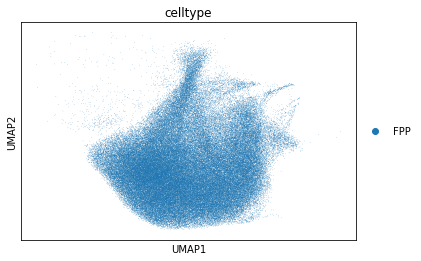

In [35]:
# plotting a umap
plotting_fcn = sc.pl.umap
plotting_fcn(adata_FPP_cpm, color='celltype')

In [36]:
adata_FPP.obs.groupby("donor_id").indices.items()

dict_items([('HPSI0114i-eipl_1', array([    0,     1,     6, ..., 10374, 10378, 10390])), ('HPSI0114i-kolf_2', array([119537, 119577, 119590, 119606, 119613, 119672, 119686, 119706,
       119760, 119770, 119793, 119798, 119822, 119850, 119852, 119881,
       119893, 119929, 120000, 120023, 120040, 120041, 120045, 120068,
       120076, 120118, 120123, 120172, 120220, 120293, 120315, 120321,
       120373, 120414, 120428, 120462, 120494, 120511, 120513, 120516,
       120545, 120565, 120568, 120596, 120602, 120614, 120620, 120629,
       120653, 120662, 120696, 120715, 120763, 120766, 120809, 120817,
       120837, 120848, 120895, 120900, 120999, 121040, 121048, 121062,
       121075, 121078, 121079, 121086, 121127, 121181, 121195, 121207,
       121226, 121270, 121276, 121323, 121350, 121420, 121439, 121447,
       121474, 121498, 121533, 121575, 121579, 121598, 121609, 121618,
       121633, 121637, 121670, 121697, 121727, 121729, 121791, 121856,
       121885, 121896, 121931, 121972

In [16]:
# aggregate the normalized and log-transformed data for per gene per individual

means = pd.DataFrame(index=adata_FPP_cpm.var_names)
for k, indices in adata_FPP.obs.groupby("donor_id").indices.items():
    means[k] = np.ravel(adata_FPP_cpm.X[indices].mean(axis=0))
    

In [17]:
df = means
df

,HPSI0114i-eipl_1,HPSI0114i-kolf_2,HPSI0114i-wegi_1,HPSI0115i-aion_2,HPSI0115i-aoxv_1,HPSI0115i-bimq_4,HPSI0115i-boqx_2,HPSI0115i-gifk_1,HPSI0115i-gost_2,HPSI0115i-hecn_6,...,HPSI1113i-ieki_3,HPSI1113i-podx_1,HPSI1113i-qolg_1,HPSI1113i-uofv_1,HPSI1113i-vuud_2,HPSI1114i-kuul_1,HPSI1114i-ualf_6,HPSI1114i-zuuy_4,HPSI1213i-hehd_1,HPSI1213i-tolg_4
index,,,,,,,,,,,,,,,,,,,,,
MIR1302-10,0.002449,0.013082,0.001719,0.011013,0.002393,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RP11-34P13.7,0.000000,0.012652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.004384,0.000000,0.000000,0.000000,0.000000,0.000000
AL627309.1,0.073093,0.000000,0.029679,0.045308,0.036845,0.067804,0.026295,0.062199,0.072015,0.035761,...,0.042136,0.054811,0.125148,0.0,0.037845,0.043032,0.000000,0.000000,0.041575,0.000000
AP006222.2,1.049182,0.686215,0.779807,0.897223,0.844194,0.761748,0.782375,0.685536,0.814821,1.133668,...,0.853297,1.284162,0.954859,0.0,0.775843,0.940652,0.940364,0.643156,0.604124,0.859748
RP4-669L17.10,0.010231,0.013870,0.004930,0.020885,0.020808,0.012808,0.000000,0.000000,0.000000,0.016514,...,0.000000,0.003878,0.000000,0.0,0.013610,0.004454,0.012526,0.000000,0.024834,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL592183.1,0.013316,0.102891,0.264528,0.024118,0.801937,0.173005,0.829788,0.559094,2.765715,1.060214,...,1.588104,0.900893,1.604101,0.0,0.777830,0.566482,1.142614,0.154303,0.843356,1.439305
AC011841.1,0.001921,0.000000,0.001708,0.000000,0.013984,0.000000,0.000000,0.061173,0.006804,0.008001,...,0.000000,0.004019,0.000000,0.0,0.016501,0.012327,0.027450,0.000000,0.004186,0.034201
AL354822.1,0.000000,0.000000,0.000000,0.000000,0.002579,0.000000,0.000000,0.000000,0.000000,0.003870,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.003142,0.000000


In [18]:
df.to_csv("FPP.csv")


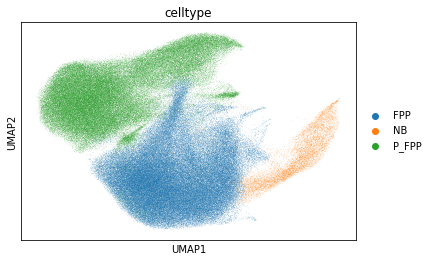

In [40]:
# now let's do the same for the other cell type - PFPP
# since this data has been already clustered and annotated- let's plot the umap plot 
plotting_fcn = sc.pl.umap
plotting_fcn(adata, color='celltype')

In [19]:
#let's subset a specific celltype 
#subsample celltype
selected_celltype = ['P_FPP']
adata_PFPP = adata[adata.obs['celltype'].isin(selected_celltype),: ]
adata_PFPP.obs.head()

,sample_index,sample_id,donor_id,cluster_id,celltype,time_point,pool_id,treatment
index,,,,,,,,
AAACCTGAGAACAACT-1-0,0,5245STDY7352549,HPSI0714i-iudw_1,2,P_FPP,D11,pool1,NONE
AAACCTGAGACAAGCC-1-0,0,5245STDY7352549,HPSI0614i-liqa_1,1,P_FPP,D11,pool1,NONE
AAACCTGAGACGCACA-1-0,0,5245STDY7352549,HPSI1113i-podx_1,1,P_FPP,D11,pool1,NONE
AAACCTGCACGTCTCT-1-0,0,5245STDY7352549,HPSI0914i-suop_5,1,P_FPP,D11,pool1,NONE
AAACCTGGTCGACTAT-1-0,0,5245STDY7352549,HPSI0115i-paim_1,1,P_FPP,D11,pool1,NONE


In [20]:
# step1.calclate qc metrics 
adata_PFPP.var['mito'] = [x.startswith('MT-') for x in adata.var.index] 
sc.pp.calculate_qc_metrics(adata_PFPP, inplace=True, qc_vars=['mito'])

Trying to set attribute `.var` of view, copying.


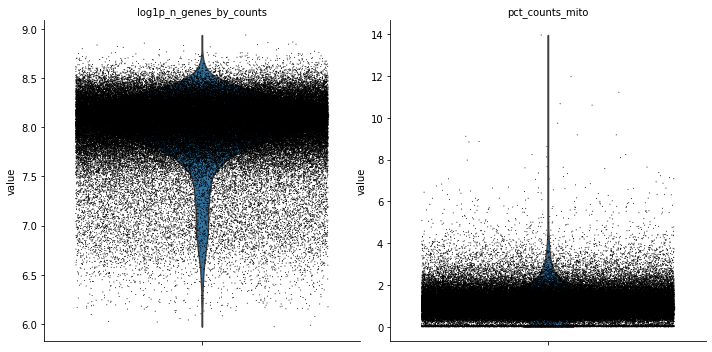

In [21]:
# step2. plotting the qc metrics
sc.pl.violin(adata_PFPP, ['log1p_n_genes_by_counts',  'pct_counts_mito'],
            jitter=0.4, multi_panel=True)

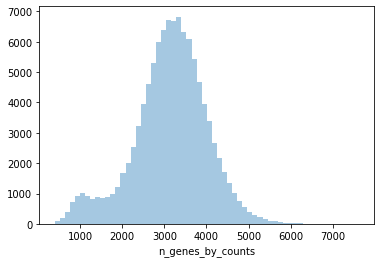

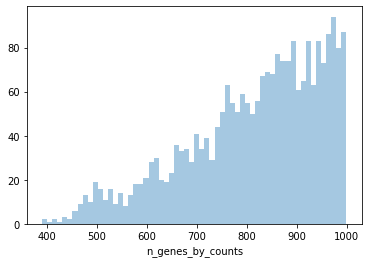

In [22]:
#step 3.we come up with thresholding decsions for genes for the FPP cells

p6 = sb.distplot(adata_PFPP.obs['n_genes_by_counts'], kde=False, bins=60)
plt.show()

# there seems to be a small population of cells expressing low (1000 gene) count, let's zoom in

p7 = sb.distplot(adata_PFPP.obs['n_genes_by_counts'][adata_PFPP.obs['n_genes_by_counts']<1000], kde=False, bins=60)
plt.show()

In [23]:
# QC 1 - cell level - remove cells with low gene counts 
# Here, we filter out the cells with low gene counts, threshold set around 1000 - 
# let's filter out 

# for the PFPP cells 
print('Number of cells before gene filter: {:d}'.format(adata_PFPP.n_obs))
sc.pp.filter_cells(adata_PFPP, min_genes = 1000)
print('Number of cells after gene filter: {:d}'.format(adata_PFPP.n_obs))


Number of cells before gene filter: 107334
Number of cells after gene filter: 104957


In [24]:
#QC 2 - cell level - remove cells with high mito fraction

print('Number of cells before MT filter: {:d}'.format(adata_PFPP.n_obs))
adata_PFPP = adata_PFPP[adata_PFPP.obs['pct_counts_mito'] < 5]
print('Number of cells after MT filter: {:d}'.format(adata_PFPP.n_obs))


Number of cells before MT filter: 104957
Number of cells after MT filter: 104834


In [25]:
#QC -3 - gene level

#Filter genes that are not expressed in more than 20 cells in the FPP cells
print('Total number of genes: {:d}'.format(adata_PFPP.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_PFPP, min_cells=20)
print('Number of genes after cell filter: {:d}'.format(adata_PFPP.n_vars))

Total number of genes: 32738


Trying to set attribute `.var` of view, copying.


Number of genes after cell filter: 20796


In [26]:
# normalization 
# The simplest way to normalize this data is to convert it to counts per million (CPM) by dividing each row by a size factor (the sum of all counts in the row), then multiplying by 1,000,000. Note that this method assumes that each cell originally contained the same amount of RNA.
adata_PFPP_cpm = adata_PFPP.copy() # apply this to a copy so we can compare methods
adata_PFPP_cpm.raw = adata_PFPP_cpm # store a copy of the raw values before normalizing
sc.pp.normalize_per_cell(adata_PFPP_cpm, 
                         counts_per_cell_after=1e6)

In [27]:
# log transformation 
sc.pp.log1p(adata_PFPP_cpm)
adata_PFPP_cpm

AnnData object with n_obs × n_vars = 104834 × 20796
    obs: 'sample_index', 'sample_id', 'donor_id', 'cluster_id', 'celltype', 'time_point', 'pool_id', 'treatment', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'n_genes', 'n_counts'
    var: 'gene_ids-0', 'gene_ids-1', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-14', 'gene_ids-15', 'gene_ids-16', 'gene_ids-17', 'gene_ids-18', 'gene_ids-19', 'gene_ids-20', 'gene_ids-21', 'gene_ids-22', 'gene_ids-23', 'gene_ids-24', 'gene_ids-25', 'gene_ids-26', 'gene_ids-27', 'gene_ids-28', 'gene_ids-29', 'gene_ids-30', 'gene_ids-31', 'gene_ids-32', 'gene_ids-33', 'gene_ids-34', 'gene_ids-35

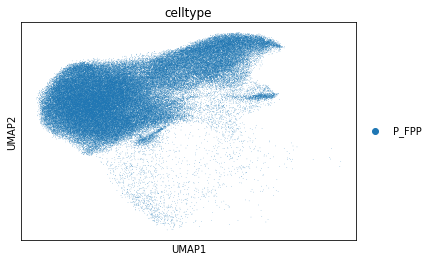

In [18]:
# plotting a umap
plotting_fcn = sc.pl.umap
plotting_fcn(adata_PFPP_cpm, color='celltype')

In [28]:
# aggregate the normalized and log-transformed data for per gene per individual

means = pd.DataFrame(index=adata_PFPP_cpm.var_names)
for k, indices in adata_PFPP.obs.groupby("donor_id").indices.items():
    means[k] = np.ravel(adata_PFPP_cpm.X[indices].mean(axis=0))
    

In [29]:
df = means
df

,HPSI0114i-eipl_1,HPSI0114i-kolf_2,HPSI0114i-wegi_1,HPSI0115i-aion_2,HPSI0115i-aoxv_1,HPSI0115i-bimq_4,HPSI0115i-boqx_2,HPSI0115i-gifk_1,HPSI0115i-gost_2,HPSI0115i-hecn_6,...,HPSI1113i-hayt_3,HPSI1113i-ieki_3,HPSI1113i-podx_1,HPSI1113i-qolg_1,HPSI1113i-vuud_2,HPSI1114i-kuul_1,HPSI1114i-ualf_6,HPSI1114i-zuuy_4,HPSI1213i-hehd_1,HPSI1213i-tolg_4
index,,,,,,,,,,,,,,,,,,,,,
MIR1302-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002432,0.000000,...,0.001781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RP11-34P13.7,0.000000,0.000000,0.000000,0.000000,0.000000,0.019801,0.000000,0.000000,0.000000,0.005309,...,0.003767,0.000000,0.000000,0.000000,0.010218,0.000000,0.000000,0.000000,0.000000,0.000000
AL627309.1,0.069166,0.022257,0.026939,0.094188,0.066195,0.084987,0.000000,0.000000,0.089419,0.052907,...,0.067675,0.025971,0.042104,0.108560,0.049462,0.054261,0.016739,0.067395,0.048919,0.112740
AP006222.2,2.027003,1.046765,1.144023,1.043241,1.324933,0.718227,1.007545,0.779634,1.183270,1.470807,...,1.229087,1.053133,2.287587,1.475975,1.138385,1.359595,1.551309,0.924470,0.942937,1.166393
RP4-669L17.10,0.013259,0.000000,0.015923,0.000000,0.048025,0.019279,0.047499,0.000000,0.006088,0.011254,...,0.015618,0.000000,0.010282,0.000000,0.006209,0.010093,0.000000,0.000000,0.011801,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL592183.1,0.014138,0.140089,0.215074,0.000000,0.851578,0.272598,0.797380,0.385968,2.730891,1.091147,...,1.600138,1.652170,0.954977,1.695644,0.860118,0.482291,1.125683,0.068382,0.906260,1.236628
AC011841.1,0.003874,0.000000,0.000000,0.000000,0.014248,0.000000,0.042842,0.000000,0.000000,0.005026,...,0.003966,0.000000,0.000000,0.000000,0.000000,0.004685,0.000000,0.000000,0.012046,0.034446
AL354822.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017444,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [30]:
df.to_csv("PFPP.csv")



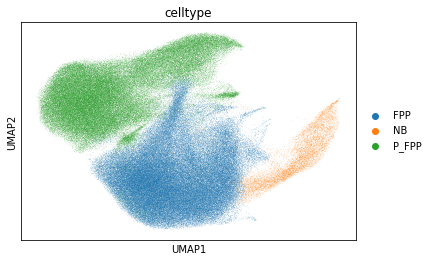

In [22]:
# now let's do the same for the other cell type - PFPP
# since this data has been already clustered and annotated- let's plot the umap plot 
plotting_fcn = sc.pl.umap
plotting_fcn(adata, color='celltype')

In [6]:
#let's subset a specific celltype 
#subsample celltype
selected_celltype = ['NB']
adata_NB = adata[adata.obs['celltype'].isin(selected_celltype),: ]
adata_NB.obs.head()

,sample_index,sample_id,donor_id,cluster_id,celltype,time_point,pool_id,treatment
index,,,,,,,,
AAAGTAGCAATGGACG-1-0,0,5245STDY7352549,HPSI0114i-eipl_1,3,NB,D11,pool1,NONE
AAAGTAGTCTTGCATT-1-0,0,5245STDY7352549,HPSI0114i-eipl_1,3,NB,D11,pool1,NONE
AACACGTAGGCTATCT-1-0,0,5245STDY7352549,HPSI0115i-paim_1,3,NB,D11,pool1,NONE
AACCATGAGCGCCTTG-1-0,0,5245STDY7352549,HPSI0114i-eipl_1,3,NB,D11,pool1,NONE
AACCATGTCCAGATCA-1-0,0,5245STDY7352549,HPSI0114i-eipl_1,3,NB,D11,pool1,NONE


In [7]:
# step1.calclate qc metrics 
adata_NB.var['mito'] = [x.startswith('MT-') for x in adata.var.index] 
sc.pp.calculate_qc_metrics(adata_NB, inplace=True, qc_vars=['mito'])

Trying to set attribute `.var` of view, copying.


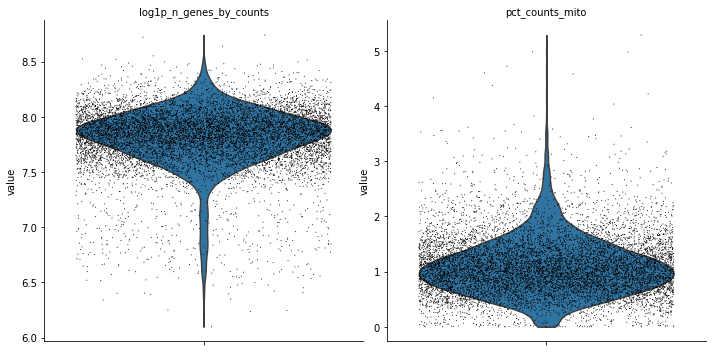

In [8]:
# step2. plotting the qc metrics
sc.pl.violin(adata_NB, ['log1p_n_genes_by_counts',  'pct_counts_mito'],
            jitter=0.4, multi_panel=True)

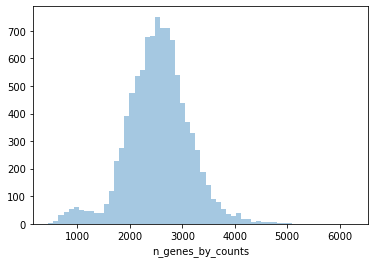

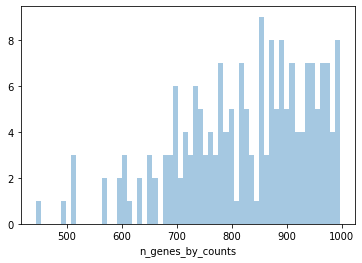

In [9]:
#step 3.we come up with thresholding decsions for genes for the FPP cells

p6 = sb.distplot(adata_NB.obs['n_genes_by_counts'], kde=False, bins=60)
plt.show()

# there seems to be a small population of cells expressing low (1000 gene) count, let's zoom in

p7 = sb.distplot(adata_NB.obs['n_genes_by_counts'][adata_NB.obs['n_genes_by_counts']<1000], kde=False, bins=60)
plt.show()

In [10]:
# QC 1 - cell level - remove cells with low gene counts 
# Here, we filter out the cells with low gene counts, threshold set around 1000 - 
# let's filter out 

# for the NB cells 
print('Number of cells before gene filter: {:d}'.format(adata_NB.n_obs))
sc.pp.filter_cells(adata_NB, min_genes = 1000)
print('Number of cells after gene filter: {:d}'.format(adata_NB.n_obs))


Number of cells before gene filter: 9973
Number of cells after gene filter: 9780


In [11]:
#QC 2 - cell level - remove cells with high mito fraction

print('Number of cells before MT filter: {:d}'.format(adata_NB.n_obs))
adata_NB = adata_NB[adata_NB.obs['pct_counts_mito'] < 5]
print('Number of cells after MT filter: {:d}'.format(adata_NB.n_obs))



Number of cells before MT filter: 9780
Number of cells after MT filter: 9779


In [12]:
#QC -3 - gene level

#Filter genes that are not expressed in more than 20 cells in the NB cells
print('Total number of genes: {:d}'.format(adata_NB.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_NB, min_cells=20)
print('Number of genes after cell filter: {:d}'.format(adata_NB.n_vars))

Total number of genes: 32738


Trying to set attribute `.var` of view, copying.


Number of genes after cell filter: 15619


In [13]:
# normalization 
# The simplest way to normalize this data is to convert it to counts per million (CPM) by dividing each row by a size factor (the sum of all counts in the row), then multiplying by 1,000,000. Note that this method assumes that each cell originally contained the same amount of RNA.
adata_NB_cpm = adata_NB.copy() # apply this to a copy so we can compare methods
adata_NB_cpm.raw = adata_NB_cpm # store a copy of the raw values before normalizing
sc.pp.normalize_per_cell(adata_NB_cpm, 
                         counts_per_cell_after=1e6)

In [14]:
# log transformation 
sc.pp.log1p(adata_NB_cpm)
adata_NB_cpm

AnnData object with n_obs × n_vars = 9779 × 15619
    obs: 'sample_index', 'sample_id', 'donor_id', 'cluster_id', 'celltype', 'time_point', 'pool_id', 'treatment', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'n_genes', 'n_counts'
    var: 'gene_ids-0', 'gene_ids-1', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-14', 'gene_ids-15', 'gene_ids-16', 'gene_ids-17', 'gene_ids-18', 'gene_ids-19', 'gene_ids-20', 'gene_ids-21', 'gene_ids-22', 'gene_ids-23', 'gene_ids-24', 'gene_ids-25', 'gene_ids-26', 'gene_ids-27', 'gene_ids-28', 'gene_ids-29', 'gene_ids-30', 'gene_ids-31', 'gene_ids-32', 'gene_ids-33', 'gene_ids-34', 'gene_ids-35',

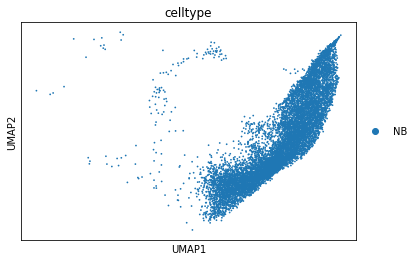

In [15]:
# plotting a umap
plotting_fcn = sc.pl.umap
plotting_fcn(adata_NB_cpm, color='celltype')

In [16]:
# aggregate the normalized and log-transformed data for per gene per individual

means = pd.DataFrame(index=adata_NB_cpm.var_names)
for k, indices in adata_NB.obs.groupby("donor_id").indices.items():
    means[k] = np.ravel(adata_NB_cpm.X[indices].mean(axis=0))
    

In [17]:
df = means
df

,HPSI0114i-eipl_1,HPSI0114i-kolf_2,HPSI0114i-wegi_1,HPSI0115i-aion_2,HPSI0115i-aoxv_1,HPSI0115i-bimq_4,HPSI0115i-boqx_2,HPSI0115i-gost_2,HPSI0115i-hecn_6,HPSI0115i-iiyk_2,...,HPSI1014i-vils_1,HPSI1113i-bima_1,HPSI1113i-hayt_3,HPSI1113i-podx_1,HPSI1113i-qolg_1,HPSI1113i-vuud_2,HPSI1114i-kuul_1,HPSI1114i-ualf_6,HPSI1114i-zuuy_4,HPSI1213i-hehd_1
index,,,,,,,,,,,,,,,,,,,,,
AL627309.1,0.037827,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.127730,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.651853,0.000000,0.000000,0.0,0.0,0.0,0.0
AP006222.2,0.734231,1.535431,0.000000,0.000000,0.560261,0.331835,0.000000,0.822802,0.404538,0.539448,...,0.817922,0.150084,0.201570,1.979448,0.000000,1.316979,0.0,0.0,0.0,0.0
RP4-669L17.10,0.021008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
RP11-206L10.3,0.058202,0.000000,0.000000,0.000000,0.000000,0.058423,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
RP11-206L10.2,0.036638,0.000000,0.000000,0.000000,0.040701,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC011043.1,0.035207,0.308305,0.000000,0.000000,0.040865,0.279047,0.874036,0.410379,0.167173,0.000000,...,1.754575,0.076632,0.601325,0.716047,0.000000,0.000000,0.0,0.0,0.0,0.0
AL592183.1,0.039340,0.000000,4.446874,0.000000,0.648480,0.055937,0.000000,2.827520,0.785526,2.206711,...,1.633867,1.867539,1.504517,1.410642,0.000000,1.316979,0.0,0.0,0.0,0.0
AC011841.1,0.020728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [18]:
df.to_csv("NB.csv")